# WeRateDogs Twitter Analysis Project

## Introduction

The goal of the project is to analyze a famous Twitter account - WeRateDogs that rates people’s dogs with a humorous comment about the dogs by gathering data from Twitter, wrangling data, analyzing, and finally visualizing data to show insights and create a comprehensive and trustworthy report. 

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

import os
import requests
import tweepy
import json
import csv
import sys
import time
import warnings

from scipy import stats

## Gathering Data

In [19]:
#1. read the WeRateDogs Twitter csv archive
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [20]:
#2. Use 'requests' to download tsv file from a website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as fd:
    fd.write(response.content)
    
image_preds = pd.read_csv('image_predictions.tsv', sep = '\t')

In [21]:
image_preds.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [22]:
#3. Query the Twitter API for each tweet's JSON data using Python's Tweepy
consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_token_secret = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [23]:
tweet_data = {}
for tweet in list(df.tweet_id):
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 290


Error for: 754011816964026368


Rate limit reached. Sleeping for: 276


In [24]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, sort_keys = True, indent=4, ensure_ascii = False)

In [25]:
tw_df = pd.read_json('tweet_json.txt', orient='index')

## Assessing Data

In [26]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
tw_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2537,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,507,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,124,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [30]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [32]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [33]:
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
tw_df.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2342.000000,2342.0,0.0,2.342000e+03,2.342000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2342.000000,2206.0,2206.0,2.600000e+01,2.600000e+01,2342.000000,2342.0,2342.000000
mean,NaN,NaN,7986.500854,0.0,NaN,7.422212e+17,7.422212e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013237,0.0,0.0,8.113972e+17,8.113972e+17,2944.953032,0.0,0.105465
std,NaN,NaN,12363.111307,0.0,NaN,6.832408e+16,6.832408e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114311,0.0,0.0,6.295843e+16,6.295843e+16,4952.547931,0.0,0.307218
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1377.250000,0.0,NaN,6.783509e+17,6.783509e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,591.500000,0.0,0.000000
50%,NaN,NaN,3473.500000,0.0,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1374.500000,0.0,0.000000
75%,NaN,NaN,9784.000000,0.0,NaN,7.986971e+17,7.986971e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3434.000000,0.0,0.000000
max,NaN,NaN,164710.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,83930.000000,0.0,1.000000


In [35]:
#find missing values in expanded_urls and check if there are precise data to fix the problem or if they will affect our analysis
df[df['expanded_urls'].isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [36]:
df[df['expanded_urls'].isnull() == True].text.values

array(['@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution',
       '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
       '@RealKentMurphy 14/10 confirmed',
       '@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs',
       "@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",
       '@Marc_IRL pixelated af 12/10',
       "RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much",
       "@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10",
       '@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
       '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately

Quick Note: It seems that there is no values to fix the missing values of expanded urls, but it won't affect the analysis.

In [37]:
#check any error of names
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [38]:
#check if key words (doggo, floofer, puppo, pupper) can also be found in the text
df[df['doggo'] != 'None'].text.values

array(['This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A',
       "Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ",
       "Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR",
       "This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw",
       'Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH',
       'This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo',
       "I have stumbled puppon a doggo painting party. They're looking to be the 

In [39]:
tw_df['lang'].unique()

array(['en', 'et', 'nl', 'ro', 'tl', 'und', 'in', 'es', 'eu'],
      dtype=object)

### Quality Issues
#### Twitter Archive (df)
1. Select non-reply or non-retweet data 
2. Drop columns of in_reply_to_status_id, in_reply_to_user_id, and retweet info, because we only need original tweet data for analysis
3. The numerator and denominator of rating should be float
4. Consist ratings by using 10 as denominator and correct wrong ratings, e.g. denominator is 0
5. Extract the exact sources of tweet, such as Twitter for iPhone, and remove the urls from sources
6. Several typos, mispellings, or nonsense in names, such as 'one', 'my', 'an', 'incredibly', tends to be lowercase

#### Tweet Data (tw_df)
7. Rename 'id' in tw_df as ‘tweet_id’, consistent with the other two tables

<br>


### Tidiness Issues
#### Twitter Archive (df)
1. Combine the four columns (doggo, floofer, pupper, puppo) into one column called ‘dog_stage’ and revise the duplicate stages in one row into a single value
2. The numerator and denominator of rating should be float
3. Convert data types of tweet_id, source, dog stages, better into string
4. Separate timestamp into two columns: date and time
5. Get ‘gender’ based on he/she in the text

#### Tweet Data (tw_df)
6. Convert data types of id from int into string
7. Only select three columns for analysis: id, favorite_count, retweet_count 

#### All Tables
8. Inner merge three datasets by tweet_id

## Cleaning Data

In [40]:
#cope dataframes
df_clean = df.copy()
image_preds_clean = image_preds.copy()
tw_df_clean = tw_df.copy()

#### Define
Select only non-retweet ones (2356 - 181 retweets = 2175)<br>
Select only non-reply ones

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [42]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull() & df_clean['in_reply_to_status_id'].isnull()]

#### Test

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define
Drop reply and retweet columns

#### Code

In [44]:
columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df_clean.drop(columns, axis = 1, inplace = True)

#### Test

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define
The numerator and denominator of rating should be float <br>
There are non-sense rating needed to be corrected, such as 0 in the denominator

#### Code

In [46]:
df_clean[df_clean.text.str.contains(r'(\d+(\.\d+))\/(\d+)')].text.values

/Users/joanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'],
      dtype=object)

In [47]:
df_clean[df_clean.text.str.contains(r'(\d+(\.\d+))\/(\d+)')][['text', 'rating_numerator', 'rating_denominator']]

/Users/joanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [48]:
#correct the problematic numerator of rating
df_clean.loc[45, 'rating_numerator'] = 13.5
df_clean.loc[695, 'rating_numerator'] = 9.75
df_clean.loc[763, 'rating_numerator'] = 11.27
df_clean.loc[1712, 'rating_numerator'] = 11.26

#### Test

In [49]:
df_clean[df_clean.text.str.contains(r'(\d+(\.\d+))\/(\d+)', na=False)][['text', 'rating_numerator', 'rating_denominator']]

/Users/joanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.50,10
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1712,Here we have uncovered an entire battalion of ...,11.26,10


In [50]:
df_clean['rating_numerator'].astype('float').dtypes

dtype('float64')

#### Define
Consist ratings by using 10 as denominator and correct wrong ratings, e.g. denominator is 0

#### Code

In [51]:
df_clean[df_clean['rating_denominator'] != 10][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
433,84.0,70
516,24.0,7
902,165.0,150
1068,9.0,11
1120,204.0,170
1165,4.0,20
1202,50.0,50
1228,99.0,90
1254,80.0,80
1274,45.0,50


In [52]:
df_clean[df_clean['rating_denominator'] != 10].rating_denominator.count()

17

In [53]:
#check if there is accurate rating in the text
df_clean[df_clean['rating_denominator'] != 10].text.values

array(['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "Here's a brigade of pup

Quick Note: <br>
It seems that there are two parts of mistakes:
1. One group is recorded wrongly, which can be corrected manually according to the rating in the text:
516	 - 11/10<br>
1068 - 14/10<br>
1165 - 13/10<br>
1202 - 11/10<br>
1662 - 10/10<br>
2335 - 9/10<br>
2. The ratings of the other group should be divided according to the dog number the owners have in total, so that the denominator will be 10 following with the correct numerator

In [54]:
#fix 1st group fist
df_clean.loc[[516, 1068, 1165, 1202, 1662, 2335], 'rating_numerator'] = [11,14, 13, 11, 10, 9]
df_clean.loc[[516, 1068, 1165, 1202, 1662, 2335], 'rating_denominator'] = 10

In [55]:
#fix the other group
df_clean[df_clean['rating_denominator'] != 10][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
433,84.0,70
902,165.0,150
1120,204.0,170
1228,99.0,90
1254,80.0,80
1274,45.0,50
1351,60.0,50
1433,44.0,40
1635,121.0,110
1779,144.0,120


In [56]:
numerator_list = df_clean[df_clean['rating_denominator'] != 10]['rating_numerator'].tolist()
denominator_list = df_clean[df_clean['rating_denominator'] != 10]['rating_denominator'].tolist()

n = 10
denominator_new_list = [i / n for i in denominator_list]
denominator_new_list  

[7.0, 15.0, 17.0, 9.0, 8.0, 5.0, 5.0, 4.0, 11.0, 12.0, 8.0]

In [57]:
div = [a / b for a, b in zip(numerator_list, denominator_new_list)]
div

[12.0, 11.0, 12.0, 11.0, 10.0, 9.0, 12.0, 11.0, 11.0, 12.0, 11.0]

In [58]:
index = df_clean[df_clean['rating_denominator'] != 10].index.tolist()

In [59]:
df_clean.loc[index, 'rating_numerator'] = div
df_clean.loc[index, 'rating_denominator'] = 10

#### Test

In [60]:
#1st group
df_clean.loc[[1068, 1165, 1202, 1662, 2335], 'rating_denominator'] 

1068    10
1165    10
1202    10
1662    10
2335    10
Name: rating_denominator, dtype: int64

In [61]:
df_clean.loc[[1068, 1165, 1202, 1662, 2335], 'rating_numerator']

1068    14.0
1165    13.0
1202    11.0
1662    10.0
2335     9.0
Name: rating_numerator, dtype: float64

In [62]:
#2nd group
df_clean.loc[index, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
433,12.0,10
902,11.0,10
1120,12.0,10
1228,11.0,10
1254,10.0,10
1274,9.0,10
1351,12.0,10
1433,11.0,10
1635,11.0,10
1779,12.0,10


In [63]:
df_clean[df_clean['rating_denominator'] != 10][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator


#### Define
Get ‘gender’ based on he/she in the text

#### Code

In [64]:
male_words=set(["him","he's",'his',"he", "himself"])
female_words=set(["her", "she's","she", "herself"])

In [65]:
def find_gender(words):
    """
    find words of genders in the sentences and categorize into female or male
    """
    m_length = len(male_words.intersection(words))
    f_length = len(female_words.intersection(words))
    
    if m_length > 0 and f_length == 0:
        gender = 'male'
    elif m_length == 0 and f_length > 0:
        gender = 'female'
    elif m_length > 0 and f_length > 0:
        gender = 'both'
    else:
        gender = 'none'
        
    return gender

In [66]:
#before find gender, cleaning the data of text column first
df_clean['text'] = df_clean['text'].str.replace(",", "")
df_clean['text'] = df_clean['text'].str.replace(".", "")

#apply find_gender and add 'gender' column in the table
df_clean['gender'] = df_clean['text'].dropna().str.lower().str.split(" ").apply(find_gender)

#### test

In [67]:
df_clean.groupby('gender').gender.count()

gender
both         5
female     351
male      1061
none       680
Name: gender, dtype: int64

#### Define
Revise 6 rows of 'both' gender data manually

#### Code

In [68]:
#check the data whose gender shows both, since it only has 6 rows
#see if they can manually alter the gender data
df_clean.query('gender == "both"').text

361     This is Leo He was a skater pup She said see y...
365     This is Dexter He was reunited with his mom ye...
781     This girl straight up rejected a guy because h...
1386    This is Vincent He's the man your girl is with...
2064    Meet Holly She's trying to teach small human-l...
Name: text, dtype: object

In [69]:
#781: This girl straight up rejected a guy because he doesn't like dogs. She is my hero and I give her 13/10
#so the gender is female
df_clean[df_clean.index == 781]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,gender
781,775729183532220416,2016-09-13 16:13:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,https://twitter.com/dog_rates/status/775729183...,13.0,10,None,None,None,None,None,both


Quick Note: It appears that the gender of the above both data should be revised as below:<br>
319 - male<br>
361 - male<br>
365 - male<br>
781 - female<br>
1386 - male<br>
2064 - female 

In [70]:
df_clean.loc[[361, 365, 1386], 'gender'] = 'male'
df_clean.loc[[781, 2064], 'gender'] = 'female'

#### Test

In [71]:
df_clean.loc[[361, 365, 1386, 781, 2064], 'gender']

361       male
365       male
1386      male
781     female
2064    female
Name: gender, dtype: object

In [72]:
df_clean.groupby('gender').gender.count()

gender
female     353
male      1064
none       680
Name: gender, dtype: int64

#### Define
Extract the exact sources of tweet, such as Twitter for iPhone, and remove the urls from sources

In [73]:
df_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Code

In [74]:
df_clean['source'] = df_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone')
df_clean['source'] = df_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_clean['source'] = df_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_clean['source'] = df_clean['source'].str.replace(
   '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [75]:
df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,gender
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas He's a mystical boy Only ever ...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,male
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly She's just checking pup on you H...,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,female
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie He is a rare Norwegian Pouncing...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,male


In [76]:
df_clean.groupby('source').source.count()

source
TweetDeck               11
Twitter Web Client      31
Vine                    91
iPhone                1964
Name: source, dtype: int64

#### Define
Correct mispelling names: several typos, mispellings, or nonsense in names, such as 'one', 'my', 'an', 'incredibly', most of them shown on lowercase

#### Code

In [77]:
#find names with lower letter
df_clean[df_clean['name'].str.islower() == True].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [78]:
df_clean[df_clean['name'].str.islower() == True].name.count()

104

In [79]:
#According to the above result, some of them we can get the real name in the text column, some cannot
named_df = df_clean.loc[(df_clean['name'].str.islower()) & (df_clean['text'].str.contains('named'))]
nameis_df = df_clean.loc[(df_clean['name'].str.islower()) & (df_clean['text'].str.contains('name is'))]
non_name_df = df_clean.loc[(df_clean['name'].str.islower())]

named_list = named_df.text.tolist()
nameis_list = nameis_df.text.tolist()
non_name_list = non_name_df.text.tolist()

In [80]:
#put the real name got from the text into the name column, and the others are replaced by None
import re

for i in named_list:
    line = df_clean.text == i
    df_clean.loc[line, 'name'] = re.findall(r"named\s(\w+)", i)   

In [81]:
for i in nameis_list:
    line = df_clean.text == i
    df_clean.loc[line, 'name'] = re.findall(r"name is\s(\w+)", i)

In [82]:
for i in non_name_list:
    line = df_clean.text == i
    df_clean.loc[line, 'name'] = 'None'

In [83]:
#there is dog name called "O" which needs to be revised too
df_clean.query('name == "O"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,gender
775,776201521193218049,2016-09-14 23:30:38 +0000,iPhone,This is O'Malley That is how he sleeps Doesn't...,https://twitter.com/dog_rates/status/776201521...,10.0,10,O,None,None,None,None,male


In [84]:
df_clean.loc[775, 'name'] = "O'Malley"

#### Test

In [85]:
df_clean[df_clean['name'].str.islower() == True].name.count()

0

In [86]:
df_clean.loc[775, 'name']

"O'Malley"

#### Define
Combine the four columns (doggo, floofer, pupper, puppo) into one column called ‘dog_stage’ and revise the duplicate stages in one row into a single value (*by choosing the latest stage of the dog)

#### Code

In [87]:
df_clean['dog_stage'] = None
# 
df_clean.name = df_clean.text.str.extract('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]{2,12})', expand=False).values

# extract status

for i in df_clean.index:
    status_set = set(re.findall('(doggo|floofer|pupper|puppo|Doggo|Floofer|Pupper|Puppo)', df_clean.loc[i,'text']))
    if len(status_set) > 0:
        status_value = ', '.join(status_set)
        df_clean.loc[i, 'dog_stage'] = status_value


In [88]:
df_clean['dog_stage'] = df_clean['dog_stage'].str.lower()

In [89]:
df_clean['dog_stage'].unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer', 'puppo, puppo, doggo',
       'puppo, doggo', 'floofer, doggo', 'pupper, doggo',
       'pupper, pupper, doggo', 'doggo, doggo', 'pupper, pupper'],
      dtype=object)

In [90]:
index = [172, 191, 200, 531, 881,460, 575, 705, 733, 889, 956, 1063, 1113]
df_clean.loc[index, 'dog_stage'] = 'doggo'
df_clean.loc[1382, 'dog_stage'] = 'pupper'

In [91]:
#drop the original four columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [92]:
df_clean['dog_stage'].unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

#### Define
Separate timestamp into two columns: date and time

#### Code

In [93]:
from datetime import datetime, timedelta

df_clean['timestamp'].dtypes, df_clean['timestamp'].iloc[0]

(dtype('O'), '2017-08-01 16:23:56 +0000')

In [94]:
#Convert data type of timestamp first
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

df_clean['year'] = df_clean['timestamp'].apply(lambda t : t.strftime('%Y'))
df_clean['month'] = df_clean['timestamp'].apply(lambda t : t.strftime('%B'))
df_clean['date'] = df_clean['timestamp'].apply(lambda t : t.strftime('%m-%d'))
df_clean['day'] = df_clean['timestamp'].apply(lambda t : t.strftime('%A'))
df_clean['time'] = df_clean['timestamp'].apply(lambda t : t.strftime('%H:%M'))

#### Test

In [95]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,dog_stage,year,month,date,day,time
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas He's a mystical boy Only ever ...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,male,None,2017,August,08-01,Tuesday,16:23
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly She's just checking pup on you H...,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,female,None,2017,August,08-01,Tuesday,00:17
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie He is a rare Norwegian Pouncing...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,male,None,2017,July,07-31,Monday,00:18
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla She commenced a snooze mid meal ...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,female,None,2017,July,07-30,Sunday,15:58
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin He would like you to stop cal...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,male,None,2017,July,07-29,Saturday,16:00


#### Define
Rename 'id' in tw_df as ‘tweet_id’, consistent with the other two tables

#### Code

In [96]:
tw_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [97]:
tw_df_clean.head(1)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2537,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,507,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."


### Define
Only select three columns for analysis: id, favorite_count, retweet_count

#### Code

In [98]:
tw_df_clean = tw_df_clean[['tweet_id', 'favorite_count','retweet_count']]
tw_df_clean.reset_index().drop('index', axis = 1)

,tweet_id,favorite_count,retweet_count
0,666020888022790144,2537,507
1,666029285002620928,128,47
2,666033412701032448,124,43
3,666044226329800704,296,139
4,666049248165822464,108,41
5,666050758794694656,132,59
6,666051853826850816,1208,841
7,666055525042405376,430,242
8,666057090499244032,291,140
9,666058600524156928,110,57


#### Test

In [99]:
tw_df_clean.head()

,tweet_id,favorite_count,retweet_count
1991-02-08 13:48:08.022790149,666020888022790144,2537,507
1991-02-08 16:08:05.002620928,666029285002620928,128,47
1991-02-08 17:16:52.701032449,666033412701032448,124,43
1991-02-08 20:17:06.329800704,666044226329800704,296,139
1991-02-08 21:40:48.165822465,666049248165822464,108,41


In [100]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 3 columns):
tweet_id          2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 73.2 KB


#### Define
Convert 'tweet_id' in all tables from int into string

#### Code

In [101]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
image_preds_clean['tweet_id'] = image_preds_clean['tweet_id'].astype(str)
tw_df_clean['tweet_id'] = tw_df_clean['tweet_id'].astype(str)

#### Test

In [102]:
df_clean['tweet_id'].dtypes, image_preds_clean['tweet_id'].dtypes, tw_df_clean['tweet_id'].dtypes

(dtype('O'), dtype('O'), dtype('O'))

#### Define
Inner merge three datasets by tweet_id

#### Code

In [103]:
from functools import reduce

dfs = [df_clean, image_preds_clean, tw_df_clean]
twitter_archive_master = reduce(lambda left, right: pd.merge(left, right, on = 'tweet_id', how = 'inner'), dfs)

#### Test

In [104]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie He is a rare Norwegian Pouncing...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,male,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24639,4081
1,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla She commenced a snooze mid meal ...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,female,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41491,8492
2,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin He would like you to stop cal...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,male,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39666,9184
3,891087950875897856,2017-07-29 00:08:17,iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,none,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19919,3058
4,890729181411237888,2017-07-28 00:22:40,iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,none,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,64374,18529


In [105]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 28 columns):
tweet_id              1284 non-null object
timestamp             1284 non-null datetime64[ns]
source                1284 non-null object
text                  1284 non-null object
expanded_urls         1284 non-null object
rating_numerator      1284 non-null float64
rating_denominator    1284 non-null int64
name                  867 non-null object
gender                1284 non-null object
dog_stage             217 non-null object
year                  1284 non-null object
month                 1284 non-null object
date                  1284 non-null object
day                   1284 non-null object
time                  1284 non-null object
jpg_url               1284 non-null object
img_num               1284 non-null int64
p1                    1284 non-null object
p1_conf               1284 non-null float64
p1_dog                1284 non-null bool
p2                    1284 no

## Storing Data

In [106]:
df_clean.to_csv("twitter_archive_clean.csv", header=True, index=False, encoding='utf-8', sep="\t")
image_preds_clean.to_csv("image_predictions.csv", header=True, index=False, encoding='utf-8', sep="\t")
tw_df_clean.to_csv("tweet_data_clean.csv", header=True, index=False, encoding='utf-8', sep="\t")
twitter_archive_master.to_csv("twitter_archive_master.csv", header=True, index=False, encoding='utf-8', sep="\t")

## Analyzing and Visualizing Data

In [107]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1284.000000,1284.0,1284.000000,1284.000000,1.284000e+03,1.284000e+03,1284.000000,1284.000000
mean,12.177196,10.0,1.185358,0.587786,1.373044e-01,6.131988e-02,8231.781931,2490.821651
std,50.615360,0.0,0.538382,0.273605,1.022429e-01,5.203010e-02,11490.714741,4017.430545
min,1.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,12.000000
25%,10.000000,10.0,1.000000,0.354800,5.419487e-02,1.646350e-02,1682.750000,571.250000
50%,11.000000,10.0,1.000000,0.579762,1.203515e-01,4.938480e-02,3778.000000,1241.500000
75%,12.000000,10.0,1.000000,0.838215,1.994975e-01,9.465185e-02,10136.000000,2958.500000
max,1776.000000,10.0,4.000000,1.000000,4.676780e-01,2.710420e-01,127390.000000,61166.000000


In [108]:
twitter_archive_master['p2_conf'].mean(),twitter_archive_master['p3_conf'].mean()

(0.13730438335289197, 0.06131988089893851)

`According to the above summary, we can get some information:
The mean of rating is 12.23/10 and a outliner is 1776/10, which needs to review respectively.
The mean of favorite count of tweets is 8,243 and the maximum is 127,536.
The mean of retweet count of tweets is 2,494 and the maximum is 61,267.
The p1_dog has the highest average prediction score 0.588.`


### Questions to be answered:
1. Which gender tweet most on this account?<br>
2. What is the distribution of the stage of dogs?<br>
3. Which channels do users come from, according to the tweet sources? <br>
4. Is there any correlation between favorite and retweet? <br>
5. What is the pattern of favorite and retweet at different dog stages?<br>
5. What is the relationship between favorite and retweet with different rating? <br>
6. Which time, day, and month the users tweet, retweet and favorite most?<br> 
7. The pattern of rating over time
8. Who are those who have higher rating? Why would they get the higher rating?<br>
9. Who got the lower rating? Why?<br>
10. What are the top 5 popular breeds of dog? How much are their ratings, retweets and favorites?<br>



####  Which gender tweet most on this account?

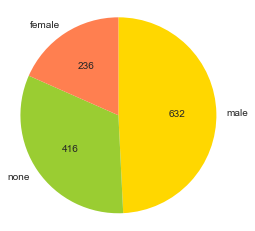

In [109]:
gender_count = twitter_archive_master['gender'].value_counts()
size = np.array(gender_count)
colors = ['gold', 'yellowgreen', 'coral', 'blue']

p, tx, autotexts = plt.pie(gender_count, labels = gender_count.index, startangle = 90, 
                           counterclock = False, autopct = "", colors = colors)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(size[i]))
    
plt.axis('square');

`Note: More tweets about male dogs (632) tweet on this account than female dogs.`

#### What is the distribution of the stage of dogs?

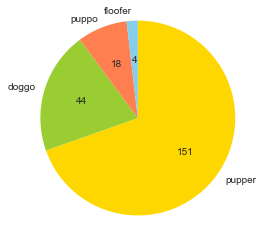

In [110]:
dog_stage_count = twitter_archive_master['dog_stage'].value_counts()
size = np.array(dog_stage_count)
colors = ['gold', 'yellowgreen', 'coral', 'skyblue']

p, tx, autotexts = plt.pie(dog_stage_count, labels = dog_stage_count.index, startangle = 90, 
                           counterclock = False, autopct = "", colors = colors)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(size[i]))
    
plt.axis('square');

`Note: There are the greatest tweet number about pupper on the acconut, which is 151.`

#### Which channels do users come from, acccording to the tweet sources? 

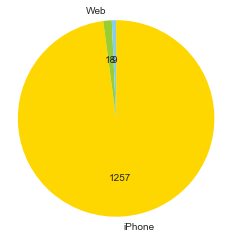

In [111]:
source_count = twitter_archive_master['source'].value_counts()
size = np.array(source_count)
colors = ['gold', 'yellowgreen', 'skyblue']
labels = ['iPhone', 'Web', '']

p, tx, autotexts = plt.pie(source_count, labels = labels, startangle = 90,
                           counterclock = False, autopct = "", colors = colors)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(size[i]))

plt.axis('square');

`Note: Most tweets are from iphone.`

#### Which time, day, month, and year do the users tweet most?

In [112]:
twitter_archive_master.groupby('year').favorite_count.count()

year
2015    443
2016    639
2017    202
Name: favorite_count, dtype: int64

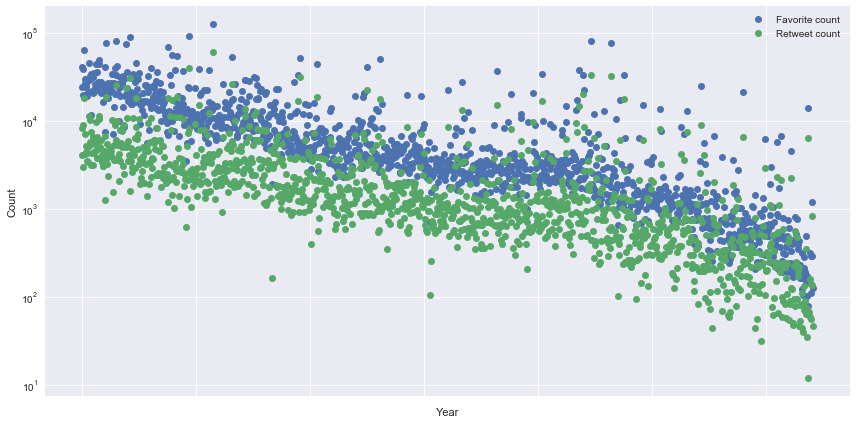

In [113]:
year_df = twitter_archive_master.set_index('year')
year_df['favorite_count'].plot(style='o', figsize=(12,6), label='Favorite count');
year_df.retweet_count.plot(style='o',label='Retweet count')
plt.legend()
plt.yscale("log")
plt.xlabel("Year");plt.ylabel("Count");
plt.tight_layout()

`Note: The favorite and retweet counts somehow represents user's active rate, and hence, based on the above year plot, it shows that the users' active increases over year, though there are several high favorite counts in the previous year.`

In [114]:
#month
month_tw = twitter_archive_master.groupby('month')[['tweet_id']].count()
month_orders = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_tw = month_tw.reindex(month_orders)

In [115]:
#day
day_tw = twitter_archive_master.groupby('day')[['tweet_id']].count()
day_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_tw = day_tw.reindex(day_index)

In [116]:
#time
twitter_archive_master['time'] = twitter_archive_master['timestamp'].apply(lambda t : t.strftime('%H'))
time_tw = twitter_archive_master.groupby('time')[['tweet_id']].count()

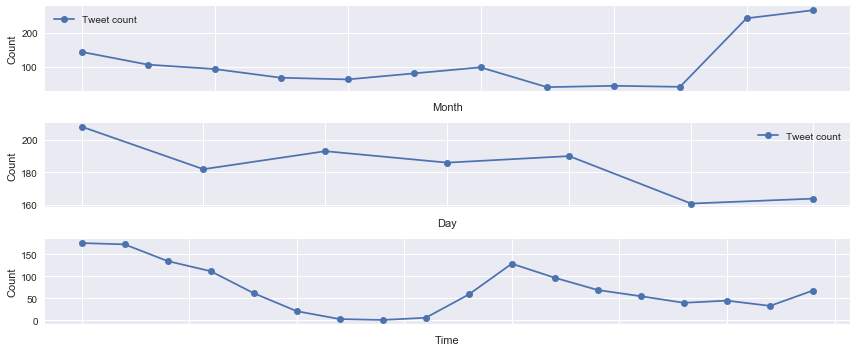

In [117]:
plt.figure(figsize=[12,60])

plt.subplot(3,1,1)
month_tw.tweet_id.plot(style='o-', figsize=(16,5), label='Tweet count')
plt.legend()
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()

plt.subplot(3,1,2)
day_tw.tweet_id.plot(style='o-', figsize=(12,5), label='Tweet count');
plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.tight_layout()

plt.subplot(3,1,3)
time_tw.tweet_id.plot(style='o-', figsize=(12,5), label='Tweet count')
plt.xlabel("Time")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("favorite_Retweet_count.png");

`Note: 
People tend to react actively on this account during holidays (e.g. Thanksgiving, Xmas), from November to January.`<br>
`In addition to month aspect, it seems that people are more active on the account on Monday.`<br>
`The most active time period is at 12 am, or 16 pm.`

#### Is there any correlation between favorite and retweet count? 
Intuitively, we assume that tweets with more favorites are correspondent to the ones with more retweets. So, we are going to see if the hypothesis is correct by checking the coorelation.

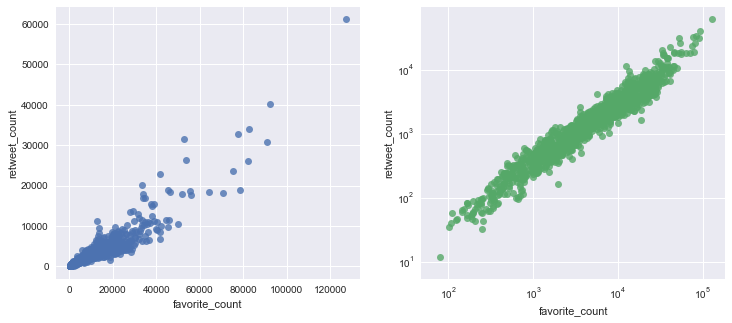

In [169]:
fig = plt.figure(figsize = [12,5]);   
ax1 = fig.add_subplot(121);  
ax2 = fig.add_subplot(122);

sns.regplot(x="favorite_count", y="retweet_count", data=twitter_archive_master, fit_reg=False, ax=ax1)
sns.regplot(x="favorite_count", y="retweet_count", data=twitter_archive_master, fit_reg=False, ax = ax2)
plt.xscale('log')
plt.yscale('log');

Line Equation: retweets = (0.32383815747192485)*favorites + -174.94344230569868
Correlation of line of best fit: 0.9262467262190127


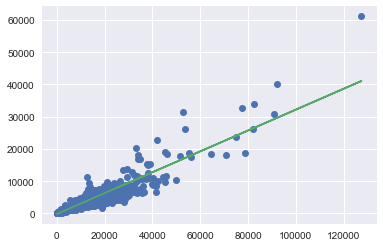

In [149]:
#another way to plot the correlation of two attributes and calculate its line equation
y, x = twitter_archive_master.retweet_count, twitter_archive_master.favorite_count
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*x+intercept
plt.plot(x, y, 'o', x, line)

print('Line Equation: retweets = ({})*favorites + {}'.format(slope,intercept))
print('Correlation of line of best fit: {}'.format(r_value))

`Note:
According to the 1st plot, the favorite count and retweet count have highly postive correlation. It means that the tweets with the higher favorite counts tend to have higher retweet counts. `

`Then we further look to its regression line by using stats.linregress(), we found that the line equation of these two attritubes is "0.3238*favorites - 174.94", following with the correlation of line best fit is 0.9262.  It appears that most tweets have less than 40,000 favorites and less than 20,000 retweets. According to the line of best fit, it tends to be 3 times as many favorite tweets as retweets. `

#### There are two outliners of rating point, so look deeper to find out the reason.

In [119]:
twitter_archive_master[twitter_archive_master['rating_numerator'] > 50]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
449,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus He's quite simply America af 1...,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,male,None,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,5403,2644
1087,670842764863651840,2015-11-29 05:52:33,iPhone,After so many requests here you go\n\nGood dog...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,none,None,...,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,25023,9013


`Note:
It found out that the highest rating tweet posted on National Day, 7/4, and the dog in the tweet is also related to it, so it wins users' attentions.`<br>
`The other tweet with second high rating is about one of the most famous celebrity in US who named dogg, rather than real dog. Due to the creativity of this tweet, it also wins the like from users.`

#### What is the pattern of favorites and retweets at different dog stages?

In [150]:
twitter_archive_master['dog_stage'].unique()

array([None, 'pupper', 'puppo', 'doggo', 'floofer'], dtype=object)

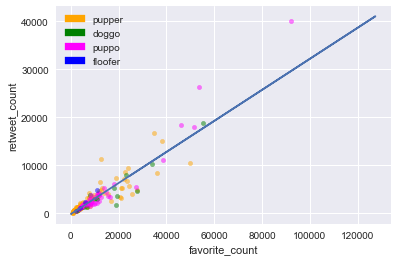

In [165]:
bx = df_pupper = twitter_archive_master.query('dog_stage == "pupper"')
df_puppo = twitter_archive_master.query('dog_stage == "puppo"')
df_doggo = twitter_archive_master.query('dog_stage == "doggo"')
df_floofer = twitter_archive_master.query('dog_stage == "floofer"')

bx = df_pupper.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'orange', alpha = .5)
df_puppo.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'green', alpha = .5, ax = bx)
df_doggo.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'magenta', alpha = .5, ax = bx)
df_floofer.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'blue', alpha = .5, ax = bx)

puppers = mpatches.Patch(label='pupper', color = 'orange')
doggo = mpatches.Patch(label='doggo', color = 'green')
puppo = mpatches.Patch(label='puppo', color = 'magenta')
floofer = mpatches.Patch(label='floofer', color = 'blue')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line);

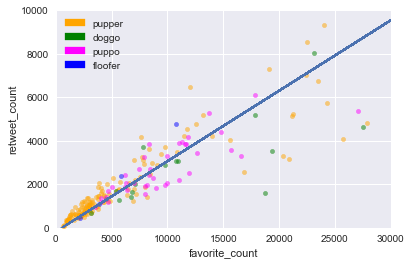

In [168]:
xlim = (0, 30000)
ylim = (0, 10000)
bx = df_pupper = twitter_archive_master.query('dog_stage == "pupper"')
df_puppo = twitter_archive_master.query('dog_stage == "puppo"')
df_doggo = twitter_archive_master.query('dog_stage == "doggo"')
df_floofer = twitter_archive_master.query('dog_stage == "floofer"')

bx = df_pupper.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'orange', alpha = .5, xlim = xlim, ylim = ylim)
df_puppo.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'green', alpha = .5, ax = bx, xlim = xlim, ylim = ylim)
df_doggo.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'magenta', alpha = .5, ax = bx, xlim = xlim, ylim = ylim)
df_floofer.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', color = 'blue', alpha = .5, ax = bx, xlim = xlim, ylim = ylim)

puppers = mpatches.Patch(label='pupper', color = 'orange')
doggo = mpatches.Patch(label='doggo', color = 'green')
puppo = mpatches.Patch(label='puppo', color = 'magenta')
floofer = mpatches.Patch(label='floofer', color = 'blue')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line);

`Note:
Since we found that most of tweet with different dog stages are under 30000 favorites and 10000 retweets (more favorites than retweets), according to the first plot, so we further examine the tweets in this range. `

`Based on the second plot, most of tweets at the dog stage of pupper receive fewer favorites and retweets, which tend to be less than 5000 favorites and 2000 retweets. By contrast, the tweets at the dog stage of puppo have more favorites and retweets and so does doggo. It is likely that the tweets with doggo, the more mature dog, tend to receive more attentions (favorites and retweets) than those of pupper, the younger dog.`

#### What is the relationship between favorite and retweet with different rating?

In [120]:
#remove the outliners and check the relationship between rating and other factors
rate_df = twitter_archive_master[twitter_archive_master['rating_numerator'] < 50]

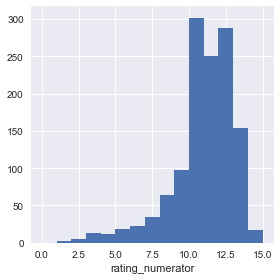

In [121]:
bin_edges = np.arange(0, 15+0.1, 1)
g = sns.FacetGrid(data = rate_df, size = 4)
g.map(plt.hist, "rating_numerator", bins = bin_edges);

`Most of tweets got the rating at 10-13.`

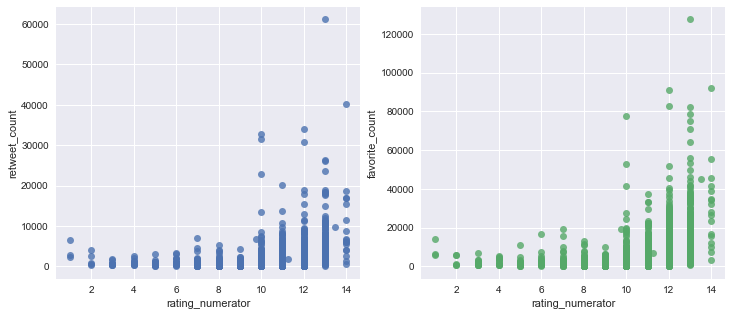

In [122]:
fig = plt.figure(figsize = [12,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.regplot(x = "rating_numerator", y = "retweet_count", data = rate_df, fit_reg = False, ax = ax1)
sns.regplot(x = "rating_numerator", y = "favorite_count", data = rate_df, fit_reg = False, ax = ax2);

`Note:
The higher rating tends to have the more retweet and like, but the highest rating is not the tweet with the highest retweet or like is not necessary. There is no exact positive or negative correlation.`

#### The pattern of rating over time 

In [123]:
month_rate = rate_df.groupby('month').rating_numerator.mean()
month_rate = month_rate.reindex(month_orders)

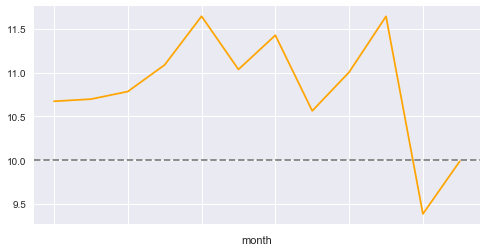

In [124]:
plt.figure(figsize = [8,4])
month_rate.plot( color = 'orange')
plt.axhline(y=10.0, color='gray', linestyle='--');

`Note:
Surprisingly, the average rating of tweets on November is the lowest because all the tweets with the lowest rating are on November.`

#### Who got the lower rating? Why? 

In [125]:
#figure out why the tweet are underrated
rate_df[rate_df.rating_numerator == 1].text.values

array(["What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://tco/RDXCfk8hK0",
       'Never seen dog like this Breathes heavy Tilts head in a pattern No bark Shitty at fetch Not even cordless 1/10 https://tco/i9iSGNn3fx',
       "Not familiar with this breed No tail (weird) Only 2 legs Doesn't bark Surprisingly quick Shits eggs 1/10 https://tco/Asgdc6kuLX"],
      dtype=object)

`Note: The tweets with lowest rating are because the tweet is not related to dog at all.`

#### What are the top 5 popular breeds of dog, based on tweet count?

In [126]:
rate_df.p1.value_counts().head()

golden_retriever      93
Pembroke              65
Labrador_retriever    62
Chihuahua             45
pug                   39
Name: p1, dtype: int64

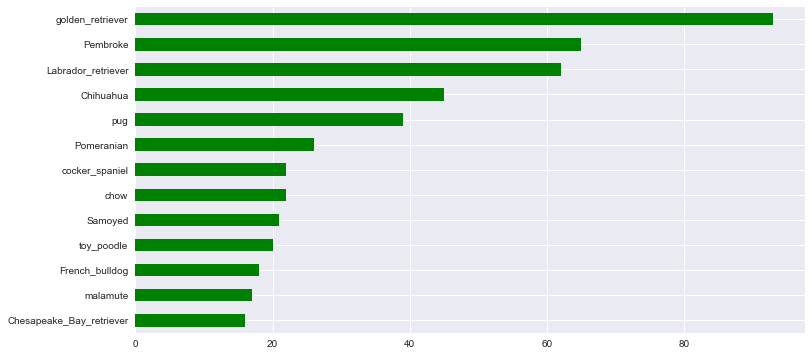

In [142]:
plt.figure(figsize = [12,6])
rate_df.p1.value_counts()[12::-1].plot(kind='barh',  color = 'green');

`Note: The top 5 breeds of dog with higher tweets are Golden_retriever, Pembroke, Labrador_retriever, Chihuahua, Pug.`

#### What are the top 5 popular breeds of dog, based on favorites and retweets?

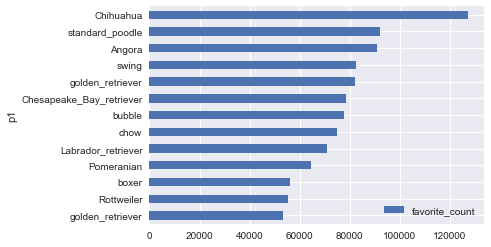

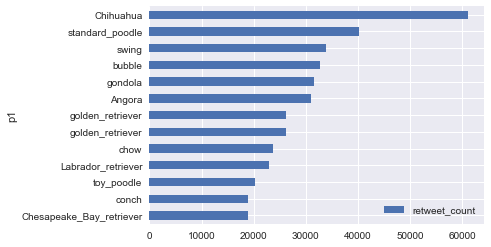

In [201]:
rate_df[['p1', 'favorite_count']].sort_values('favorite_count', ascending = False)[12::-1].set_index(['p1']).plot(kind = 'barh');
rate_df[['p1', 'retweet_count']].sort_values('retweet_count', ascending = False)[12::-1].set_index(['p1']).plot(kind = 'barh');

`Note:
Based on the above two charts, the top 5 breeds of favorites and retweets are different from those of tweet counts. It is somewhat out of expectation because it is assumed that the most common dog breed is supposed to have more favorites and retweets, while it seems not like that on the plots. Why? Maybe it is because the less common breeds attracts people's attention more in part due to its uniqueness or people's curiosities. Or it is likely that the prediction from neraul network still is not much precise, so some breeds could not be distinguished from the prediction or be wrongly predicted. Is it related to the user behavior or related to the accuracy of prediction of breeds? It is worth to dig out the reasons behind the patterns afterwards.
`

#### Based on the top 5 common breeds, how many favorites, retweets, and rating they got? Any different between different gender?

In [127]:
breed_df = rate_df.query('p1 == ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]')

In [128]:
breed_df.groupby(['p1','gender']).tweet_id.count()

p1                  gender
Chihuahua           female     6
                    male      25
                    none      14
Labrador_retriever  female    14
                    male      24
                    none      24
Pembroke            female    10
                    male      32
                    none      23
golden_retriever    female    30
                    male      36
                    none      27
pug                 female     5
                    male      24
                    none      10
Name: tweet_id, dtype: int64

/Users/joanna/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/joanna/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


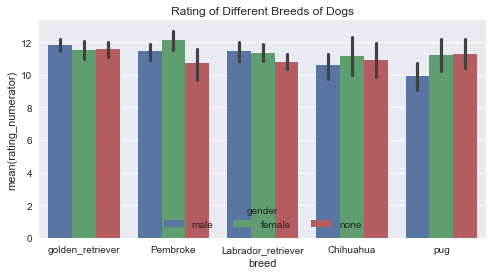

In [129]:
breed_order = ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]
plt.figure(figsize = [8,4])
ax = sns.barplot(data = breed_df, x = 'p1', y = 'rating_numerator', hue = 'gender', order = breed_order)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.xlabel('breed')
plt.title('Rating of Different Breeds of Dogs');

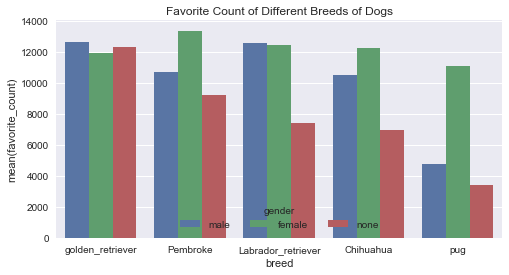

In [130]:
breed_order = ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]
plt.figure(figsize = [8,4])
ax = sns.barplot(data = breed_df, x = 'p1', y = 'favorite_count', hue = 'gender', order = breed_order, ci=None)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.xlabel('breed')
plt.title('Favorite Count of Different Breeds of Dogs');

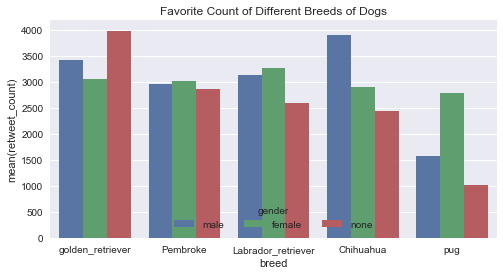

In [131]:
breed_order = ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]
plt.figure(figsize = [8,4])
ax = sns.barplot(data = breed_df, x = 'p1', y = 'retweet_count', hue = 'gender', order = breed_order, ci=None)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.xlabel('breed')
plt.title('Favorite Count of Different Breeds of Dogs');

`Note:
The top 5 breeds of dog with higher tweets are Golden_retriever, Pembroke, Labrador_retriever, Chihuahua, Pug. They are all male dogs more than female dogs, but there are nearly equal number of female and male of golden retriever.`
<br>
<br>
    `The first popular breed, golden retriever, tends to have higher favorite and retweet count, but female pembroke has the most favorite counts among female dogs and male chihuahua also has the most retweet counts among male dogs.`


## Recap of the Process of Data Wrangling

There are two major ideas I plan to explore from the analysis.

First, I want to know if there is any correlation between favorite and retweet. So, I made the hypothesis that more favorites tend to have more retweets. Then I’ll test my hypothesis through regression model.

Second, I want to find the factors that contribute to more favorites and retweets and higher rating. So, I assume that the dogs’ profiles (e.g. dog gender, dog breed, dog stage), tweet time, content have positive correlations with favorites, retweets and rating. I first see the basic information on this Twitter account through univariate exploration of data (Q1 - Q3). Then, I further explore insights through bivariate and multivariate visualizations (Q4 - Q11) to see the relationship between different attritubes.

## Conclusion of Analysis
Based on the above analysis, it seems that favorites and retweets have positive cooleration. Most of tweets receive favorites 3 times more than retweets. It somehow corresponds to the user behavior that people tend to do more like than retweeting because the action of liking the post is quicker than that of retweeting. 

In terms of the attributes related to favorites, retweets, and rating, it appears that the factors of tweet content, tweet time, and dog profiles (breeds, stages) have more contribution. As a reult, if the account would like to tweet anything to get higher user enegagement rate, it can consider these attributes. For instance, a tweet with the words and image about male golden retriever dogs related to the specific holiday, such as National Day or Christmas, at midnight on Monday on November or December is more likely to get more attentions and more retweet and like from users on Twitter. 
